
<a id='fundamental-types'></a>

# Arrays, Tuples, Ranges, and Other Fundamental Types

## Contents

- [Arrays, Tuples, Ranges, and Other Fundamental Types](#Arrays,-Tuples,-Ranges,-and-Other-Fundamental-Types)  
  - [Overview](#Overview)  
  - [Array Basics](#Array-Basics)  
  - [Operations on Arrays](#Operations-on-Arrays)  
  - [Ranges](#Ranges)  
  - [Tuples and Named Tuples](#Tuples-and-Named-Tuples)  
  - [Nothing, Missing, and Unions](#Nothing,-Missing,-and-Unions)  
  - [Exercises](#Exercises)  
  - [Solutions](#Solutions)  

> “Let’s be clear: the work of science has nothing whatever to do with consensus.
> Consensus is the business of politics. Science, on the contrary, requires only
> one investigator who happens to be right, which means that he or she has
> results that are verifiable by reference to the real world. In science
> consensus is irrelevant. What is relevant is reproducible results.” – Michael Crichton

## Overview

In Julia, arrays and tuples are the most important data type for working with numerical data.

In this lecture we give more details on

- creating and manipulating Julia arrays  
- fundamental array processing operations  
- basic matrix algebra  
- tuples and named tuples  
- ranges  
- nothing, missing, and unions  

In [2]:
using LinearAlgebra, Statistics

## Array Basics

([See multi-dimensional arrays documentation](https://docs.julialang.org/en/v1/manual/arrays/))

Since it is one of the most important types, we will start with arrays.

Later, we will see how arrays (and all other types in Julia) are handled in a generic and extensible way.

### Shape and Dimension

We’ve already seen some Julia arrays in action

In [ ]:
a = [10, 20, 30]

In [3]:
a = [1.0, 2.0, 3.0]

3-element Vector{Float64}:
 1.0
 2.0
 3.0

The output tells us that the arrays are of types `Array{Int64,1}` and `Array{Float64,1}` respectively.

Here `Int64` and `Float64` are types for the elements inferred by the compiler.

We’ll talk more about types later.

The `1` in `Array{Int64,1}` and `Array{Any,1}` indicates that the array is
one dimensional (i.e., a `Vector`).

This is the default for many Julia functions that create arrays

In [2]:
typeof(randn(100))

Vector{Float64} (alias for Array{Float64, 1})

In Julia, one dimensional vectors are best interpreted as column vectors, which we will see when we take transposes.

We can check the dimensions of `a` using `size()` and `ndims()`
functions

In [4]:
ndims(a)

1

In [5]:
size(a)

(3,)

The syntax `(3,)` displays a tuple containing one element – the size along the one dimension that exists.

#### Array vs Vector vs Matrix

In Julia, `Vector` and `Matrix` are just aliases for one- and two-dimensional arrays
respectively

In [6]:
Array{Int64, 1} == Vector{Int64}
Array{Int64, 2} == Matrix{Int64}

true

Vector construction with `,` is then interpreted as a column vector.

To see this, we can create a column vector and row vector more directly

In [7]:
[1, 2, 3] == [1; 2; 3]  # both column vectors

true

In [8]:
[1 2 3]  # a row vector is 2-dimensional

1×3 Matrix{Int64}:
 1  2  3

As we’ve seen, in Julia we have both

- one-dimensional arrays (i.e., flat arrays)  
- arrays of size `(1, n)` or `(n, 1)` that represent row and column vectors respectively  


Why do we need both?

On one hand, dimension matters for matrix algebra.

- Multiplying by a row vector is different to multiplying by a column vector.  


On the other, we use arrays in many settings that don’t involve matrix algebra.

In such cases, we don’t care about the distinction between row and column vectors.

This is why many Julia functions return flat arrays by default.


<a id='creating-arrays'></a>

### Creating Arrays

#### Functions that Create Arrays

We’ve already seen some functions for creating a vector filled with `0.0`

In [10]:
zeros(3)

3-element Vector{Float64}:
 0.0
 0.0
 0.0

This generalizes to matrices and higher dimensional arrays

In [9]:
zeros(2, 2)

2×2 Matrix{Float64}:
 0.0  0.0
 0.0  0.0

To return an array filled with a single value, use `fill`

In [11]:
fill(5.0, 2, 2)

2×2 Matrix{Float64}:
 5.0  5.0
 5.0  5.0

Finally, you can create an empty array using the `Array()` constructor

In [12]:
x = Array{Float64}(undef, 2, 2)

2×2 Matrix{Float64}:
 5.0e-324  1.02318e-311
 1.5e-323  1.02318e-311

The printed values you see here are just garbage values.

(the existing contents of the allocated memory slots being interpreted as 64 bit floats)

If you need more control over the types, fill with a non-floating point

In [13]:
fill(0, 2, 2)  # fills with 0, not 0.0

2×2 Matrix{Int64}:
 0  0
 0  0

Or fill with a boolean type

In [14]:
fill(false, 2, 2)  # produces a boolean matrix

2×2 Matrix{Bool}:
 0  0
 0  0

#### Creating Arrays from Existing Arrays

For the most part, we will avoid directly specifying the types of arrays, and let the compiler deduce the optimal types on its own.

The reasons for this, discussed in more detail in [this lecture](https://julia.quantecon.org/../more_julia/generic_programming.html), are to ensure both clarity and generality.

One place this can be inconvenient is when we need to create an array based on an existing array.

First, note that assignment in Julia binds a name to a value, but does not make a copy of that type

In [3]:
x = [1, 2, 3]
y = x
y[1] = 2
x

3-element Vector{Int64}:
 2
 2
 3

In the above, `y = x` simply creates a new named binding called `y` which refers to whatever `x` currently binds to.

To copy the data, you need to be more explicit

In [4]:
x = [1, 2, 3]
y = copy(x)
y[1] = 2
x

3-element Vector{Int64}:
 1
 2
 3

However, rather than making a copy of `x`, you may want to just have a similarly sized array

In [5]:
x = [1, 2, 3]
y = similar(x)
y

3-element Vector{Int64}:
 5
 4
 0

We can also use `similar` to pre-allocate a vector with a different size, but the same shape

In [6]:
x = [1, 2, 3]
y = similar(x, 4)  # make a vector of length 4

4-element Vector{Int64}:
 0
 0
 0
 0

Which generalizes to higher dimensions

In [7]:
x = [1, 2, 3]
y = similar(x, 2, 2)  # make a 2x2 matrix

2×2 Matrix{Int64}:
 1048576  0
       0  0

#### Array Definitions from Literals

As we’ve seen, you can create one dimensional arrays from manually specified data like so

In [11]:
a = [10, 20, 30, 40]

4-element Vector{Int64}:
 10
 20
 30
 40

In two dimensions we can proceed as follows

In [13]:
a = [10 20 30 40]  # two dimensional, shape is 1 x n

1×4 Matrix{Int64}:
 10  20  30  40

In [14]:
ndims(a)

2

In [15]:
a = [10 20; 30 40]  # 2 x 2

2×2 Matrix{Int64}:
 10  20
 30  40

You might then assume that `a = [10; 20; 30; 40]` creates a two dimensional column vector but this isn’t the case.

In [16]:
a = [10; 20; 30; 40]

4-element Vector{Int64}:
 10
 20
 30
 40

In [17]:
ndims(a)

1

Instead transpose the matrix (or adjoint if complex)

In [18]:
a = [10 20 30 40]'

4×1 adjoint(::Matrix{Int64}) with eltype Int64:
 10
 20
 30
 40

In [19]:
ndims(a)

2

Note, however, that the transformed array is not a matrix but rather a special type (e.g., `adjoint(::Matrix{Int64}) with eltype Int64`).

Keeping the special structure of a transposed array can let Julia use more efficient algorithms in some cases.

Finally, we can see how to create multidimensional arrays from literals with the `;` separator.

First, we can create a vector

In [20]:
[1; 2]

2-element Vector{Int64}:
 1
 2

Next, by appending an additional `;` we can tell it to use a 2 dimensional array

In [21]:
[1; 2;;]

2×1 Matrix{Int64}:
 1
 2

Or 3 dimensions

In [22]:
[1; 2;;;]

2×1×1 Array{Int64, 3}:
[:, :, 1] =
 1
 2

Or a 1x1 matrix with a single value

In [23]:
[1;;]

1×1 Matrix{Int64}:
 1

Or a 2x2x1 array

In [24]:
[1 2; 3 4;;;]

2×2×1 Array{Int64, 3}:
[:, :, 1] =
 1  2
 3  4

### Array Indexing

We’ve already seen the basics of array indexing

In [25]:
a = [10 20 30 40]
a[end - 1]

30

In [26]:
a[1:3]

3-element Vector{Int64}:
 10
 20
 30

For 2D arrays the index syntax is straightforward

In [27]:
a = randn(2, 2)
a[1, 1]

-0.23971995906458052

In [28]:
a[1, :]  # first row

2-element Vector{Float64}:
 -0.23971995906458052
 -0.8635311037952442

In [29]:
a[:, 1]  # first column

2-element Vector{Float64}:
 -0.23971995906458052
  0.9683113310017379

Booleans can be used to extract elements

In [30]:
a = randn(2, 2)

2×2 Matrix{Float64}:
 -0.857465  -1.47893
  0.50815   -0.00944503

In [41]:
b = [true false; false true]

2×2 Matrix{Bool}:
 1  0
 0  1

In [42]:
a[b]

2-element Vector{Float64}:
 -0.8574646597978195
 -0.009445034987199561

This is useful for conditional extraction, as we’ll see below.

An aside: some or all elements of an array can be set equal to one number using slice notation.

In [43]:
a = zeros(4)

4-element Vector{Float64}:
 0.0
 0.0
 0.0
 0.0

In [44]:
a[2:end] .= 42

3-element view(::Vector{Float64}, 2:4) with eltype Float64:
 42.0
 42.0
 42.0

In [45]:
a

4-element Vector{Float64}:
  0.0
 42.0
 42.0
 42.0

### Views and Slices

Using the `:` notation provides a slice of an array, copying the sub-array to a new array with a similar type.

In [46]:
a = [1 2; 3 4]
b = a[:, 2]
@show b
a[:, 2] = [4, 5] # modify a
@show a
@show b;

b = [2, 4]
a = [1 4; 3 5]
b = [2, 4]


A **view** on the other hand does not copy the value

In [47]:
a = [1 2; 3 4]
@views b = a[:, 2]
@show b
a[:, 2] = [4, 5]
@show a
@show b;

b = [2, 4]
a = [1 4; 3 5]
b = [4, 5]


Note that the only difference is the `@views` macro, which will replace any slices with views in the expression.

An alternative is to call the `view` function directly – though it is generally discouraged since it is a step away from the math.

In [50]:
@views b = a[:, 2]
view(a, :, 2) == b

true

As with most programming in Julia, it is best to avoid prematurely assuming that `@views` will have a significant impact on performance, and stress code clarity above all else.

Another important lesson about `@views` is that they **are not** normal, dense arrays.

In [53]:
a = [1 2; 3 4]
b_slice = a[:, 2]
@show typeof(b_slice)
@show typeof(a)
@views b = a[:, 2]
@show typeof(b);

typeof(b_slice) = Vector{Int64}
typeof(a) = Matrix{Int64}
typeof(b) = SubArray{Int64, 1, Matrix{Int64}, Tuple{Base.Slice{Base.OneTo{Int64}}, Int64}, true}


The type of `b` is a good example of how types are not as they may seem.

Similarly

In [56]:
a = [1 2; 3 4]
b = a'   # transpose
typeof(b)

Adjoint{Int64, Matrix{Int64}}

To copy into a dense array

In [57]:
a = [1 2; 3 4]
b = a' # transpose
c = Matrix(b)  # convert to matrix
d = collect(b) # also `collect` works on any iterable
c == d

true

### Special Matrices

As we saw with `transpose`, sometimes types that look like matrices are not stored as a dense array.

As an example, consider creating a diagonal matrix

In [58]:
d = [1.0, 2.0]
a = Diagonal(d)

2×2 Diagonal{Float64, Vector{Float64}}:
 1.0   ⋅ 
  ⋅   2.0

As you can see, the type is `2×2 Diagonal{Float64,Array{Float64,1}}`, which is not a 2-dimensional array.

The reasons for this are both efficiency in storage, as well as efficiency in arithmetic and matrix operations.

In every important sense, matrix types such as `Diagonal` are just as much a “matrix” as the dense matrices we have using (see the [introduction to types lecture](https://julia.quantecon.org/introduction_to_types.html) for more)

In [59]:
@show 2a
b = rand(2, 2)
@show b * a;

2a = [2.0 0.0; 0.0 4.0]
b * a = [0.9757449716335836 0.8227190656794356; 0.9910669969782158 1.7402369376621811]


Another example is in the construction of an identity matrix, where a naive implementation is

In [60]:
b = [1.0 2.0; 3.0 4.0]
b - Diagonal([1.0, 1.0])  # poor style, inefficient code

2×2 Matrix{Float64}:
 0.0  2.0
 3.0  3.0

Whereas you should instead use

In [61]:
b = [1.0 2.0; 3.0 4.0]
b - I  # good style, and note the lack of dimensions of I

2×2 Matrix{Float64}:
 0.0  2.0
 3.0  3.0

While the implementation of `I` is a little abstract to go into at this point, a hint is:

In [62]:
typeof(I)

UniformScaling{Bool}

This is a `UniformScaling` type rather than an identity matrix, making it much more powerful and general.

### Assignment and Passing Arrays

As discussed above, in Julia, the left hand side of an assignment is a “binding” or a label to a value.

In [63]:
x = [1 2 3]
y = x  # name `y` binds to whatever value `x` bound to

1×3 Matrix{Int64}:
 1  2  3

The consequence of this, is that you can re-bind that name.

In [68]:
x = [1 2 3]
y = x        # name `y` binds to whatever `x` bound to
z = [2 3 4]
y = z        # only changes name binding, not value!
@show (x, y, z);

(x, y, z) = ([1 2 3], [2 3 4], [2 3 4])


What this means is that if `a` is an array and we set `b = a` then `a` and `b` point to exactly the same data.

In the above, suppose you had meant to change the value of `x` to the values of `y`, you need to assign the values rather than the name.

In [69]:
x = [1 2 3]
y = x       # name `y` binds to whatever `x` bound to
z = [2 3 4]
y .= z      # now dispatches the assignment of each element
@show (x, y, z);

(x, y, z) = ([2 3 4], [2 3 4], [2 3 4])


Alternatively, you could have used `y[:] = z`.

This applies to in-place functions as well.

First, define a simple function for a linear map

In [70]:
function f(x)
    return [1 2; 3 4] * x  # matrix * column vector
end

val = [1, 2]
f(val)

2-element Vector{Int64}:
  5
 11

In general, these “out-of-place” functions are preferred to “in-place” functions, which modify the arguments.

In [74]:
function f(x)
    return [1 2; 3 4] * x # matrix * column vector
end

val = [1, 2]
y = similar(val)

function f!(out, x)
    out .= [1 2; 3 4] * x
end
@show y
f!(y, val)
y

y = [0, 0]


2-element Vector{Int64}:
  5
 11

This demonstrates a key convention in Julia: functions which modify any of the arguments have the name ending with `!` (e.g. `push!`).

We can also see a common mistake, where instead of modifying the arguments, the name binding is swapped

In [92]:
function f(x)
    return [1 2; 3 4] * x  # matrix * column vector
end

val = [1, 2]
y = similar(val)

function f!(out, x)
    out = [1 2; 3 4] * x   # MISTAKE! Should be .=
end
f!(y, val)
y

val = [1, 2] = [1, 2]
y = similar(val) = [1776136356560, 1776136503648]


2-element Vector{Int64}:
 1776136356560
 1776136503648

The frequency of making this mistake is one of the reasons to avoid in-place functions, unless proven to be necessary by benchmarking.

### In-place and Immutable Types

Note that scalars are always immutable, such that

In [93]:
y = [1 2]
y .-= 2    # y .= y .- 2, no problem

x = 5
# x .-= 2  # Fails!
x = x - 2  # subtle difference - creates a new value and rebinds the variable

3

In particular, there is no way to pass any immutable into a function and have it modified

In [94]:
x = 2

function f(x)
    x = 3     # MISTAKE! does not modify x, creates a new value!
end

f(x)          # cannot modify immutables in place
@show x;

x = 2


This is also true for other immutable types such as tuples, as well as some vector types

In [97]:
using StaticArrays
xdynamic = [1, 2]
xstatic = @SVector [1, 2]  # turns it into a highly optimized static vector

f(x) = 2x
@show f(xdynamic)
@show f(xstatic)

# inplace version
function g(x)
    x .= 2x
    return "Success!"
end
@show xdynamic
@show g(xdynamic)
@show xdynamic;

# g(xstatic) # fails, static vectors are immutable

f(xdynamic) = [2, 4]
f(xstatic) = [2, 4]
xdynamic = [1, 2]
g(xdynamic) = "Success!"
xdynamic = [2, 4]


2-element Vector{Int64}:
 2
 4

## Operations on Arrays

### Array Methods

Julia provides standard functions for acting on arrays, some of which we’ve
already seen

In [100]:
a = [-1, 0, 1]

@show length(a)
@show sum(a)
@show mean(a)
@show std(a)      # standard deviation
@show var(a)      # variance
@show maximum(a)
@show minimum(a)
@show extrema(a)  # (mimimum(a), maximum(a))

length(a) = 3
sum(a) = 0
mean(a) = 0.0
std(a) = 1.0
var(a) = 1.0
maximum(a) = 1
minimum(a) = -1
extrema(a) = (-1, 1)


(-1, 1)

To sort an array

In [101]:
b = sort(a, rev = true)  # returns new array, original not modified

3-element Vector{Int64}:
  1
  0
 -1

In [102]:
b = sort!(a, rev = true)  # returns *modified original* array

3-element Vector{Int64}:
  1
  0
 -1

In [103]:
b == a  # tests if have the same values

true

In [104]:
b === a  # tests if arrays are identical (i.e share same memory)

true

### Matrix Algebra

For two dimensional arrays, `*` means matrix multiplication

In [105]:
a = ones(1, 2)

1×2 Matrix{Float64}:
 1.0  1.0

In [106]:
b = ones(2, 2)

2×2 Matrix{Float64}:
 1.0  1.0
 1.0  1.0

In [107]:
a * b

1×2 Matrix{Float64}:
 2.0  2.0

In [108]:
b * a'

2×1 Matrix{Float64}:
 2.0
 2.0

To solve the linear system $ A X = B $ for $ X $ use `A \ B`

In [109]:
A = [1 2; 2 3]

2×2 Matrix{Int64}:
 1  2
 2  3

In [110]:
B = ones(2, 2)

2×2 Matrix{Float64}:
 1.0  1.0
 1.0  1.0

In [111]:
A \ B

2×2 Matrix{Float64}:
 -1.0  -1.0
  1.0   1.0

In [112]:
inv(A) * B

2×2 Matrix{Float64}:
 -1.0  -1.0
  1.0   1.0

Although the last two operations give the same result, the first one is numerically more stable and should be preferred in most cases.

Multiplying two **one** dimensional vectors gives an error – which is reasonable since the meaning is ambiguous.

More precisely, the error is that there isn’t an implementation of `*` for two one dimensional vectors.

The output explains this, and lists some other methods of `*` which Julia thinks are close to what we want.

In [113]:
ones(2) * ones(2)  # does not conform, expect error

MethodError: MethodError: no method matching *(::Vector{Float64}, ::Vector{Float64})

Closest candidates are:
  *(::Any, ::Any, !Matched::Any, !Matched::Any...)
   @ Base operators.jl:587
  *(!Matched::Adjoint{<:Any, <:SparseArrays.CHOLMOD.Sparse}, ::VecOrMat)
   @ SparseArrays C:\Users\klaus\AppData\Local\Programs\Julia-1.10.4\share\julia\stdlib\v1.10\SparseArrays\src\solvers\cholmod.jl:1253
  *(!Matched::Adjoint{<:Number, <:AbstractVector}, ::AbstractVector{<:Number})
   @ LinearAlgebra C:\Users\klaus\AppData\Local\Programs\Julia-1.10.4\share\julia\stdlib\v1.10\LinearAlgebra\src\adjtrans.jl:462
  ...


Instead, you could take the transpose to form a row vector

In [117]:
ones(2)' * ones(2)

2.0

Alternatively, for inner product in this setting use `dot()` or the unicode `\cdot<TAB>`

In [118]:
@show dot(ones(2), ones(2))
@show ones(2) ⋅ ones(2);

dot(ones(2), ones(2)) = 2.0
ones(2) ⋅ ones(2) = 2.0


Matrix multiplication using one dimensional vectors similarly follows from treating them as
column vectors.  Post-multiplication requires a transpose

In [119]:
b = ones(2, 2)
b * ones(2)

2-element Vector{Float64}:
 2.0
 2.0

In [120]:
ones(2)' * b

1×2 adjoint(::Vector{Float64}) with eltype Float64:
 2.0  2.0

Note that the type of the returned value in this case is not `Array{Float64,1}` but rather
`Adjoint{Float64,Array{Float64,1}}`.

This is since the left multiplication by a row vector should also be a row-vector.  It also hints
that the types in Julia more complicated than first appears in the surface notation, as we will explore
further in the [introduction to types lecture](https://julia.quantecon.org/introduction_to_types.html).

### Elementwise Operations

#### Algebraic Operations

Suppose that we wish to multiply every element of matrix `A` with the corresponding element of matrix `B`.

In that case we need to replace `*` (matrix multiplication) with `.*` (elementwise multiplication).

For example, compare

In [121]:
ones(2, 2) * ones(2, 2)   # matrix multiplication

2×2 Matrix{Float64}:
 2.0  2.0
 2.0  2.0

In [122]:
ones(2, 2) .* ones(2, 2)   # element by element multiplication

2×2 Matrix{Float64}:
 1.0  1.0
 1.0  1.0

This is a general principle: `.x` means apply operator `x` elementwise

In [123]:
A = -ones(2, 2)

2×2 Matrix{Float64}:
 -1.0  -1.0
 -1.0  -1.0

In [124]:
A .^ 2  # square every element

2×2 Matrix{Float64}:
 1.0  1.0
 1.0  1.0

However in practice some operations are mathematically valid without broadcasting, and hence the `.` can be omitted.

In [125]:
ones(2, 2) + ones(2, 2)  # same as ones(2, 2) .+ ones(2, 2)

2×2 Matrix{Float64}:
 2.0  2.0
 2.0  2.0

Scalar multiplication is similar

In [127]:
A = ones(2, 2)

2×2 Matrix{Float64}:
 1.0  1.0
 1.0  1.0

In [128]:
2 * A  # same as 2 .* A

2×2 Matrix{Float64}:
 2.0  2.0
 2.0  2.0

In fact you can omit the `*` altogether and just write `2A`.

Unlike MATLAB and other languages, scalar addition requires the `.+` in order to correctly broadcast

In [129]:
x = [1, 2]
x .+ 1     # not x + 1
x .- 1     # not x - 1

2-element Vector{Int64}:
 0
 1

#### Elementwise Comparisons

Elementwise comparisons also use the `.x` style notation

In [130]:
a = [10, 20, 30]

3-element Vector{Int64}:
 10
 20
 30

In [131]:
b = [-100, 0, 100]

3-element Vector{Int64}:
 -100
    0
  100

In [132]:
b .> a

3-element BitVector:
 0
 0
 1

In [133]:
a .== b

3-element BitVector:
 0
 0
 0

We can also do comparisons against scalars with parallel syntax

In [134]:
b

3-element Vector{Int64}:
 -100
    0
  100

In [135]:
b .> 1

3-element BitVector:
 0
 0
 1

This is particularly useful for *conditional extraction* – extracting the elements of an array that satisfy a condition

In [136]:
a = randn(4)

4-element Vector{Float64}:
 -0.5022579848230437
  0.5125680171050151
 -0.4392459664412464
 -1.089533272041507

In [137]:
a .< 0

4-element BitVector:
 1
 0
 1
 1

In [138]:
a[a .< 0]

3-element Vector{Float64}:
 -0.5022579848230437
 -0.4392459664412464
 -1.089533272041507

#### Changing Dimensions

The primary function for changing the dimensions of an array is `reshape()`

In [140]:
a = [10, 20, 30, 40]

4-element Vector{Int64}:
 10
 20
 30
 40

In [141]:
b = reshape(a, 2, 2)

2×2 Matrix{Int64}:
 10  30
 20  40

In [142]:
b

2×2 Matrix{Int64}:
 10  30
 20  40

Notice that this function returns a view on the existing array.

This means that changing the data in the new array will modify the data in the
old one.

In [143]:
b[1, 1] = 100  # continuing the previous example

100

In [144]:
b

2×2 Matrix{Int64}:
 100  30
  20  40

In [145]:
a

4-element Vector{Int64}:
 100
  20
  30
  40

To collapse an array along one dimension you can use `dropdims()`

In [146]:
a = [1 2 3 4]  # two dimensional

1×4 Matrix{Int64}:
 1  2  3  4

In [147]:
dropdims(a, dims = 1)

4-element Vector{Int64}:
 1
 2
 3
 4

The return value is an array with the specified dimension “flattened”.

### Broadcasting Functions

Julia provides standard mathematical functions such as `log`, `exp`, `sin`, etc.

In [148]:
log(1.0)

0.0

By default, these functions act *elementwise* on arrays

In [149]:
log.(1:4)

4-element Vector{Float64}:
 0.0
 0.6931471805599453
 1.0986122886681098
 1.3862943611198906

Note that we can get the same result as with a comprehension or more explicit loop

In [150]:
[log(x) for x in 1:4]

4-element Vector{Float64}:
 0.0
 0.6931471805599453
 1.0986122886681098
 1.3862943611198906

Nonetheless the syntax is convenient.

### Linear Algebra

([See linear algebra documentation](https://docs.julialang.org/en/v1/stdlib/LinearAlgebra/))

Julia provides some a great deal of additional functionality related to linear operations

In [151]:
A = [1 2; 3 4]

2×2 Matrix{Int64}:
 1  2
 3  4

In [152]:
det(A)

-2.0

In [153]:
tr(A)

5

In [154]:
eigvals(A)

2-element Vector{Float64}:
 -0.3722813232690143
  5.372281323269014

In [155]:
rank(A)

2

## Ranges

As with many other types, a `Range` can act as a vector.

In [156]:
a = 10:12        # a range, equivalent to 10:1:12
@show Vector(a)  # can convert, but shouldn't

b = Diagonal([1.0, 2.0, 3.0])
b * a .- [1.0; 2.0; 3.0]

Vector(a) = [10, 11, 12]


3-element Vector{Float64}:
  9.0
 20.0
 33.0

Ranges can also be created with floating point numbers using the same notation.

In [ ]:
a = 0.0:0.1:1.0  # 0.0, 0.1, 0.2, ... 1.0

But care should be taken if the terminal node is not a multiple of the set sizes.

In [157]:
maxval = 1.0
minval = 0.0
stepsize = 0.15
a = minval:stepsize:maxval # 0.0, 0.15, 0.3, ...
maximum(a) == maxval

false

To evenly space points where the maximum value is important, i.e., `linspace` in other languages

In [158]:
maxval = 1.0
minval = 0.0
numpoints = 10
a = range(minval, maxval, length = numpoints)
# or range(minval, stop=maxval, length=numpoints)

maximum(a) == maxval

true

## Tuples and Named Tuples

([See tuples](https://docs.julialang.org/en/v1/manual/functions/#Tuples-1) and [named tuples documentation](https://docs.julialang.org/en/v1/manual/functions/#Named-Tuples-1))

We were introduced to tuples earlier, which provide high-performance immutable sets of distinct types.

In [159]:
t = (1.0, "test")
t[1]            # access by index
a, b = t        # unpack
# t[1] = 3.0    # would fail as tuples are immutable
println("a = $a and b = $b")

a = 1.0 and b = test


As well as **named tuples**, which extend tuples with names for each argument.

In [160]:
t = (; val1 = 1.0, val2 = "test") # ; is optional but good form
t.val1      # access by index
println("val1 = $(t.val1) and val2 = $(t.val2)") # access by name
(; val1, val2) = t  # unpacking notation (note the ;)
println("val1 = $val1 and val2 = $val2")

val1 = 1.0 and val2 = test
val1 = 1.0 and val2 = test


While immutable, it is possible to manipulate tuples and generate new ones

In [161]:
t2 = (; val3 = 4, val4 = "test!!")
t3 = merge(t, t2)  # new tuple

(val1 = 1.0, val2 = "test", val3 = 4, val4 = "test!!")

Named tuples are a convenient and high-performance way to manage and unpack sets of parameters

In [162]:
function f(parameters)
    alpha, beta = parameters.alpha, parameters.beta # poor style, error prone
    return alpha + beta
end

parameters = (; alpha = 0.1, beta = 0.2)
f(parameters)

0.30000000000000004

This functionality is aided by the unpacking notation

In [163]:
function f(parameters)
    (; alpha, beta) = parameters  # good style, less sensitive to errors
    return alpha + beta
end

parameters = (; alpha = 0.1, beta = 0.2)
f(parameters)

0.30000000000000004

To generate parameters with defaults, you can create a function—which can also do intermediate calculations

In [164]:
function param_gen(; alpha = 0.1, beta = 0.2)
    return (; alpha, beta)
end
@show param_gen()
@show param_gen(; alpha = 0.2)

param_gen() = (alpha = 0.1, beta = 0.2)
param_gen(; alpha = 0.2) = (alpha = 0.2, beta = 0.2)


(alpha = 0.2, beta = 0.2)

For alternative approaches:

- An alternative approach, defining a new type using `struct` tends to be more prone to accidental misuse, leads to a great deal of boilerplate code, and requires a julia restart after every update.  
- You can also use the `@with_kw` in the `Parameters.jl` package, which automatically creates a function.  e.g., `param_gen = @with_kw (alpha = 0.1, beta = 0.2)` would be roughly equivalent to the above.  

## Nothing, Missing, and Unions

Sometimes a variable, return type from a function, or value in an array needs to represent the absence of a value rather than a particular value.

There are two distinct use cases for this

1. `nothing` (“software engineers null”): used where no value makes sense in a particular context due to a failure in the code, a function parameter not passed in, etc.  
1. `missing` (“data scientists null”): used when a value would make conceptual sense, but it isn’t available.  



<a id='error-handling'></a>

### Nothing and Basic Error Handling

The value `nothing` is a single value of type `Nothing`

In [165]:
typeof(nothing)

Nothing

An example of a reasonable use of `nothing` is if you need to have a variable defined in an outer scope, which may or may not be set in an inner one

In [167]:
function f(y)
    x = nothing
    if y > 0.0
        # calculations to set `x`
        x = y
    end

    # later, can check `x`
    if isnothing(x)
        println("x was not set")
    else
        println("x = $x")
    end
    x
end

@show f(1.0)
@show f(-1.0);

x = 1.0
f(1.0) = 1.0
x was not set
f(-1.0) = nothing


While in general you want to keep a variable name bound to a single type in Julia, this is a notable exception.

Similarly, if needed, you can return a `nothing` from a function to indicate that it did not calculate as expected.

In [168]:
function f(x)
    if x > 0.0
        return sqrt(x)
    else
        return nothing
    end
end
x1 = 1.0
x2 = -1.0
y1 = f(x1)
y2 = f(x2)

# check results with isnothing
if isnothing(y1)
    println("f($x2) successful")
else
    println("f($x2) failed")
end

f(-1.0) failed


As an aside, an equivalent way to write the above function is to use the
[ternary operator](https://docs.julialang.org/en/v1/manual/control-flow/index.html#man-conditional-evaluation-1),
which gives a compact if/then/else structure

In [ ]:
function f(x)
    x > 0.0 ? sqrt(x) : nothing  # the "a ? b : c" pattern is the ternary
end

f(1.0)

We will sometimes use this form when it makes the code more clear (and it will occasionally make the code higher performance).

Regardless of how `f(x)` is written,  the return type is an example of a union, where the result could be one of an explicit set of types.

In this particular case, the compiler would deduce that the type would be a `Union{Nothing,Float64}` – that is, it returns either a floating point or a `nothing`.

You will see this type directly if you use an array containing both types

In [169]:
x = [1.0, nothing]

2-element Vector{Union{Nothing, Float64}}:
 1.0
  nothing

When considering error handling, whether you want a function to return `nothing` or simply fail depends on whether the code calling `f(x)` is carefully checking the results.

For example, if you were calling on an array of parameters where a priori you were not sure which ones will succeed, then

In [172]:
x = [0.1, -1.0, 2.0, -2.0]
y = f.(x)

# presumably check `y`

AssertionError: AssertionError: x > 0.0

On the other hand, if the parameter passed is invalid and you would prefer not to handle a graceful failure, then using an assertion is more appropriate.

In [171]:
function f(x)
    @assert x > 0.0
    sqrt(x)
end

f(1.0)

1.0

Finally, `nothing` is a good way to indicate an optional parameter in a function

In [173]:
function f(x; z = nothing)
    if isnothing(z)
        println("No z given with $x")
    else
        println("z = $z given with $x")
    end
end

f(1.0)
f(1.0, z = 3.0)

No z given with 1.0
z = 3.0 given with 1.0


An alternative to `nothing`, which can be useful and sometimes higher performance,
is to use `NaN` to signal that a value is invalid returning from a function.

In [174]:
function f(x)
    if x > 0.0
        return x
    else
        return NaN
    end
end

f(0.1)
f(-1.0)

@show typeof(f(-1.0))
@show f(-1.0) == NaN  # note, this fails!
@show isnan(f(-1.0))  # check with this

typeof(f(-1.0)) = Float64
f(-1.0) == NaN = false
isnan(f(-1.0)) = true


true

Note that in this case, the return type is `Float64` regardless of the input for `Float64` input.

Keep in mind, though, that this only works if the return type of a function is `Float64`.

### Exceptions

(See [exceptions documentation](https://docs.julialang.org/en/v1/manual/control-flow/index.html#Exception-Handling-1))

While returning a `nothing` can be a good way to deal with functions which may or may not return values, a more robust error handling method is to use exceptions.

Unless you are writing a package, you will rarely want to define and throw your own exceptions, but will need to deal with them from other libraries.

The key distinction for when to use an exceptions vs. return a `nothing` is whether an error is unexpected rather than a normal path of execution.

An example of an exception is a `DomainError`, which signifies that a value passed to a function is invalid.

In [175]:
# throws exception, turned off to prevent breaking notebook
# sqrt(-1.0)

# to see the error
try
    sqrt(-1.0)
catch err
    err
end  # catches the exception and prints it

DomainError(-1.0, "sqrt was called with a negative real argument but will only return a complex result if called with a complex argument. Try sqrt(Complex(x)).")

Another example you will see is when the compiler cannot convert between types.

In [176]:
# throws exception, turned off to prevent breaking notebook
# convert(Int64, 3.12)

# to see the error
try
    convert(Int64, 3.12)
catch err
    err
end  # catches the exception and prints it.

InexactError(:Int64, Int64, 3.12)

If these exceptions are generated from unexpected cases in your code, it may be appropriate simply let them occur and ensure you can read the error.

Occasionally you will want to catch these errors and try to recover, as we did above in the `try` block.

In [178]:
function f(x)
    try
        sqrt(x)
    catch err                # enters if exception thrown
        sqrt(complex(x, 0))  # convert to complex number
    end
end

f(0.0)
f(-1.0)

0.0 + 1.0im


<a id='missing'></a>

### Missing

(see [“missing” documentation](https://docs.julialang.org/en/v1/manual/missing/))

The value `missing` of type `Missing` is used to represent missing value in a statistical sense.

For example, if you loaded data from a panel, and gaps existed

In [179]:
x = [3.0, missing, 5.0, missing, missing]

5-element Vector{Union{Missing, Float64}}:
 3.0
  missing
 5.0
  missing
  missing

A key feature of `missing` is that it propagates through other function calls - unlike `nothing`

In [180]:
f(x) = x^2

@show missing + 1.0
@show missing * 2
@show missing * "test"
@show f(missing);      # even user-defined functions
@show mean(x);

missing + 1.0 = missing
missing * 2 = missing
missing * "test" = missing
f(missing) = missing
mean(x) = missing


The purpose of this is to ensure that failures do not silently fail and provide meaningless numerical results.

This even applies for the comparison of values, which

In [ ]:
x = missing

@show x == missing
@show x === missing  # an exception
@show ismissing(x);

Where `ismissing` is the canonical way to test the value.

In the case where you would like to calculate a value without the missing values, you can use `skipmissing`.

In [ ]:
x = [1.0, missing, 2.0, missing, missing, 5.0]

@show mean(x)
@show mean(skipmissing(x))
@show coalesce.(x, 0.0);  # replace missing with 0.0;

As `missing` is similar to R’s `NA` type, we will see more of `missing` when we cover `DataFrames`.

## Exercises


<a id='np-ex1'></a>

### Exercise 1

This exercise uses matrix operations that arise in certain problems,
including when dealing with linear stochastic difference equations.

If you aren’t familiar with all the terminology don’t be concerned – you can
skim read the background discussion and focus purely on the matrix exercise.

With that said, consider the stochastic difference equation


<a id='equation-ja-sde'></a>
$$
X_{t+1} = A X_t + b + \Sigma W_{t+1} \tag{4.1}
$$

Here

- $ X_t, b $ and $ X_{t+1} $ are $ n \times 1 $  
- $ A $ is $ n \times n $  
- $ \Sigma $ is $ n \times k $  
- $ W_t $ is $ k \times 1 $ and $ \{W_t\} $ is iid with zero mean and variance-covariance matrix equal to the identity matrix  


Let $ S_t $ denote the $ n \times n $ variance-covariance matrix of $ X_t $.

Using the rules for computing variances in matrix expressions, it can be shown from [(4.1)](#equation-ja-sde) that $ \{S_t\} $ obeys


<a id='equation-ja-sde-v'></a>
$$
S_{t+1} = A S_t A' + \Sigma \Sigma' \tag{4.2}
$$

It can be shown that, provided all eigenvalues of $ A $ lie within the unit circle, the sequence $ \{S_t\} $ converges to a unique limit $ S $.

This is the **unconditional variance** or **asymptotic variance** of the stochastic difference equation.

As an exercise, try writing a simple function that solves for the limit $ S $ by iterating on [(4.2)](#equation-ja-sde-v) given $ A $ and $ \Sigma $.

To test your solution, observe that the limit $ S $ is a solution to the matrix equation


<a id='equation-ja-dle'></a>
$$
S = A S A' + Q
\quad \text{where} \quad Q := \Sigma \Sigma' \tag{4.3}
$$

This kind of equation is known as a **discrete time Lyapunov equation**.

The [QuantEcon package](http://quantecon.org/quantecon-jl)
provides a function called `solve_discrete_lyapunov` that implements a fast
“doubling” algorithm to solve this equation.

Test your iterative method against `solve_discrete_lyapunov` using matrices

$$
A =
\begin{bmatrix}
    0.8 & -0.2  \\
    -0.1 & 0.7
\end{bmatrix}
\qquad
\Sigma =
\begin{bmatrix}
    0.5 & 0.4 \\
    0.4 & 0.6
\end{bmatrix}
$$

In [194]:
# test values
A = [0.8 -0.2; -0.1 0.7]
Σ = [0.5 0.4; 0.4 0.6]

# setting up function
function asymptotic_variance(A, Σ, max_iter = 1e6, tol = 1e-12)
    S0 = Σ * Σ'  # initial S value
    S = S0       # S links to the initial value
    iter = 1
    error = Inf
    while iter <= max_iter && error > tol
        S_new = A*S*A' + S0
        error = norm(S-S_new)
        S = S_new
        iter += 1
    end
    S
end
asymptotic_variance(A, Σ)


2×2 Matrix{Float64}:
 0.671231  0.633474
 0.633474  0.858874

### Exercise 2

Take a stochastic process for $ \{y_t\}_{t=0}^T $

$$
y_{t+1} = \gamma + \theta y_t + \sigma w_{t+1}
$$

where

- $ w_{t+1} $ is distributed `Normal(0,1)`  
- $ \gamma=1, \sigma=1, y_0 = 0 $  
- $ \theta \in \Theta \equiv \{0.8, 0.9, 0.98\} $  


Given these parameters

- Simulate a single $ y_t $ series for each $ \theta \in \Theta $
  for $ T = 150 $.  Feel free to experiment with different $ T $.  
- Overlay plots of the rolling mean of the process for each $ \theta \in \Theta $,
  i.e. for each $ 1 \leq \tau \leq T $ plot  


$$
\frac{1}{\tau}\sum_{t=1}^{\tau}y_T
$$

- Simulate $ N=200 $ paths of the stochastic process above to the $ T $,
  for each $ \theta \in \Theta $, where we refer to an element of a particular
  simulation as $ y^n_t $.  
- Overlay plots a histogram of the stationary distribution of the final
  $ y^n_T $ for each $ \theta \in \Theta $.  Hint: pass `alpha`
  to a plot to make it transparent (e.g. `histogram(vals, alpha = 0.5)`) or
  use `stephist(vals)` to show just the step function for the histogram.  
- Numerically find the mean and variance of this as an ensemble average, i.e.
  $ \sum_{n=1}^N\frac{y^n_T}{N} $ and
  $ \sum_{n=1}^N\frac{(y_T^n)^2}{N} -\left(\sum_{n=1}^N\frac{y^n_T}{N}\right)^2 $.  


Later, we will interpret some of these in [this lecture](https://julia.quantecon.org/../tools_and_techniques/lln_clt.html).

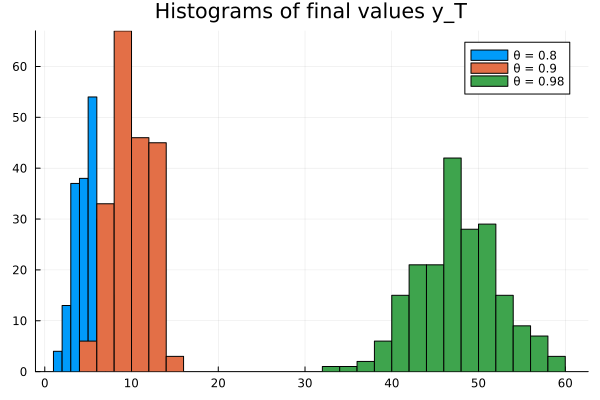

In [231]:
using Plots
p = plot(title = "Histograms of final values y_T")
N = 200
T = 150
# γ, σ, y0 = 1, 1, 0
# Θ = [0.8, 0.9, 0.98]
params = (; γ = 1.0, σ = 1.0, y0 = 0, Θ = [0.8, 0.9, 0.98])

function y_series(params, T)
    y = zeros(T+1, length(params.Θ))    # create an array where all y series can be stored
    means = similar(y)
    y[1,:] .= params.y0
    means[1,:] .= y[1,:]
    for (i, θ) in enumerate(params.Θ)
        for t in 1:T
            y[t+1, i] = params.γ + θ*y[t,i] + params.σ*randn()
            means[t+1, i] = mean(y[1:t+1, i]) 
        end
        # plot!(means[:,i], label = "θ = $θ") # plots the inidividual time-series
    end
    return(y)
end
y_series(params, T)

# now create a function for a Monte-Carlo Simulation of this
function MC(N; params=params, T=T)
    y_T = zeros(N, length(params.Θ))
    for n in 1:N
        y_T[n, :] = y_series(params, T)[end, :]
    end
    for (i,θ) in enumerate(params.Θ)
        histogram!(y_T[:, i], label = "θ = $θ")
    end
end
MC(N)
display(p)


### Exercise 3

Let the data generating process for a variable be

$$
y = a x_1 + b x_1^2 + c x_2 + d + \sigma w
$$

where $ y, x_1, x_2 $ are scalar observables, $ a,b,c,d $ are parameters to estimate, and $ w $ are iid normal with mean 0 and variance 1.

First, let’s simulate data we can use to estimate the parameters

- Draw $ N=50 $ values for $ x_1, x_2 $ from iid normal distributions.  


Then, simulate with different $ w $

- Draw a $ w $ vector for the `N` values and then `y` from this simulated data if the parameters were $ a = 0.1, b = 0.2 c = 0.5, d = 1.0, \sigma = 0.1 $.  
- Repeat that so you have `M = 20` different simulations of the `y` for the `N` values.  


Finally, calculate order least squares manually (i.e., put the observables
into matrices and vectors, and directly use the equations for
[OLS](https://en.wikipedia.org/wiki/Ordinary_least_squares) rather than a package).

- For each of the `M=20` simulations, calculate the OLS estimates for $ a, b, c, d, \sigma $.  
- Plot a histogram of these estimates for each variable.  

### Exercise 4

Redo Exercise 1 using the `fixedpoint` function from `NLsolve` [this lecture](https://julia.quantecon.org/julia_by_example.html).

Compare the number of iterations of the NLsolve’s Anderson Acceleration to the handcoded iteration used in Exercise 1.

Hint: Convert the matrix to a vector to use `fixedpoint`. e.g. `A = [1 2; 3 4]` then `x = reshape(A, 4)` turns it into a vector.  To reverse, `reshape(x, 2, 2)`.

## Solutions

### Exercise 1

Here’s the iterative approach

In [187]:
function compute_asymptotic_var(A, Sigma;
                                S0 = Sigma * Sigma',
                                tolerance = 1e-6,
                                maxiter = 500)
    V = Sigma * Sigma'
    S = S0
    err = tolerance + 1
    i = 1
    while err > tolerance && i <= maxiter
        next_S = A * S * A' + V
        err = norm(S - next_S)
        S = next_S
        i += 1
    end
    return S
end

compute_asymptotic_var (generic function with 1 method)

In [188]:
A = [0.8 -0.2;
     -0.1 0.7]

Sigma = [0.5 0.4;
         0.4 0.6]

2×2 Matrix{Float64}:
 0.5  0.4
 0.4  0.6

Note that all eigenvalues of $ A $ lie inside the unit disc.

In [189]:
maximum(abs, eigvals(A))

0.9

Let’s compute the asymptotic variance

In [190]:
our_solution = compute_asymptotic_var(A, Sigma)

2×2 Matrix{Float64}:
 0.671228  0.633476
 0.633476  0.858874

Now let’s do the same thing using QuantEcon’s `solve_discrete_lyapunov()` function and check we get the same result.

In [ ]:
using QuantEcon

In [ ]:
norm(our_solution - solve_discrete_lyapunov(A, Sigma * Sigma'))